## Real Estate - Price Prediction

In [1]:
import pandas as pd
import numpy as np

housing = pd.read_csv("data.csv")

housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [2]:
housing.info() # checking missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
housing.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.281579   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702164   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.884000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.209000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.619000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [4]:
%matplotlib inline 
# the graphs will be shown here itself

In [5]:
import matplotlib.pyplot as plt
# # For Histogram
# housing.hist(bins=50, figsize=(20, 15)) # gives an overall estimate of the data

## Train - Test Split

In [6]:
# # Altho the function is present in scikit-learn

# def split_train_test(data, test_ratio):
#     np.random.seed(42) # when this is done, the random set generated is fixed
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]


# x_train, x_test = split_train_test(housing, 0.2) # testsize = 20% of data
# print(len(x_train), len(x_test))

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(housing, test_size=0.2, random_state=42)
print(len(x_train), len(x_test))

404 102


The above splitting poses a problem:
For eg. int the feature CHAS, there are 471 observation that is 0
and all if the training/test set contain only 0s, then the model will not put into consideration, that '1' is an observation too

To prevent this, we'll use stratified sampling

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
splitS = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in splitS.split(housing, housing['CHAS']):
    x_strat_train = housing.loc[train_index]
    x_strat_test = housing.loc[test_index]

In [9]:
x_strat_test['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

Now, we can make the training set as our main dataset

In [10]:
housing = x_strat_train.copy()

## Looking for Correlations

In [11]:
corr_matrix = housing.corr()

print(corr_matrix['MEDV'].sort_values(ascending=False))

MEDV       1.000000
RM         0.677208
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64


array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

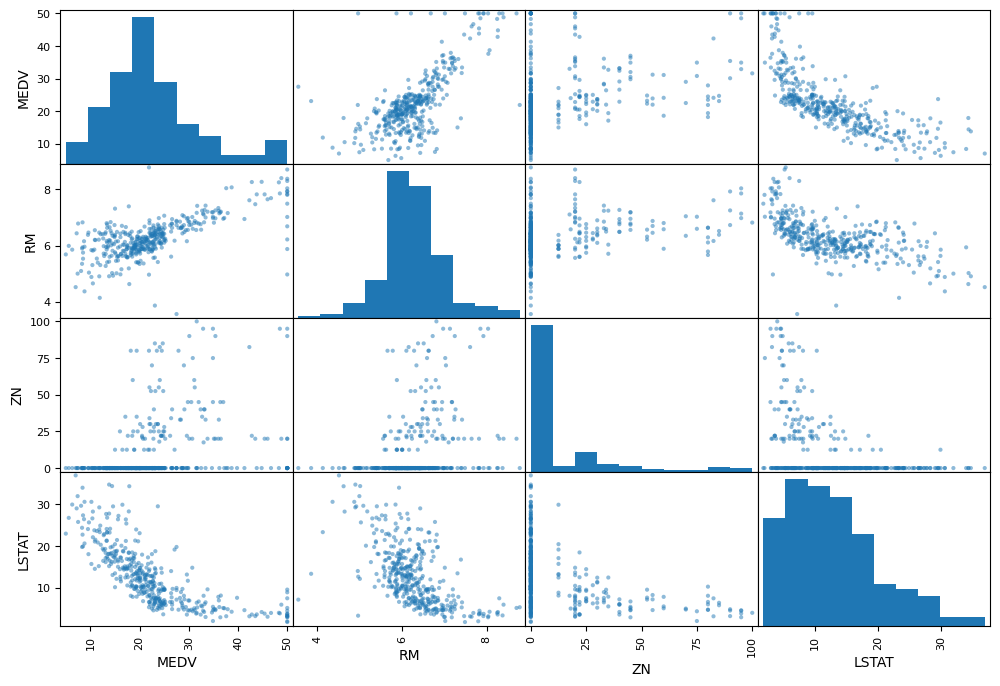

In [12]:
from pandas.plotting import scatter_matrix

attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [13]:
# From the above scatterplot, it is quite evident that there exist a good positive correlation b/w  MEDV and RM
# So, we analyze it more


<AxesSubplot: xlabel='RM', ylabel='MEDV'>

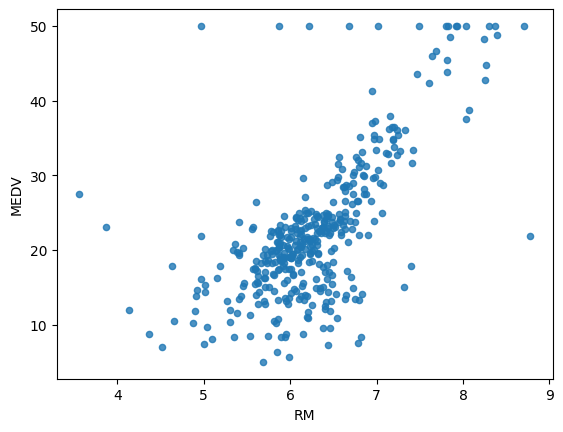

In [14]:
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.8)

Now, seeing the above scatterplot we can remove outliers and other inconsistensies to clean our data

## Attribute Combinations

In [15]:
housing['TAXRM'] = housing['TAX'] / housing['RM'] # TAXRM -> Tax per room

housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
254  0.04819  80.0   3.64     0  0.392  6.108  32.0  9.2203    1  315   
348  0.01501  80.0   2.01     0  0.435  6.635  29.7  8.3440    4  280   
476  4.87141   0.0  18.10     0  0.614  6.484  93.6  2.3053   24  666   
321  0.18159   0.0   7.38     0  0.493  6.376  54.3  4.5404    5  287   
326  0.30347   0.0   7.38     0  0.493  6.312  28.9  5.4159    5  287   

     PTRATIO       B  LSTAT  MEDV       TAXRM  
254     16.4  392.89   6.57  21.9   51.571709  
348     17.0  390.94   5.99  24.5   42.200452  
476     20.2  396.21  18.68  16.7  102.714374  
321     19.6  396.90   6.87  23.1   45.012547  
326     19.6  396.90   6.15  23.0   45.468948

In [16]:
corr_matrix_new = housing.corr()

print(corr_matrix_new['MEDV'].sort_values(ascending=False))

MEDV       1.000000
RM         0.677208
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.521967
LSTAT     -0.740494
Name: MEDV, dtype: float64


Thus, we can see an good negative correlation b/w MEDV and TAXRM 

<AxesSubplot: xlabel='TAXRM', ylabel='MEDV'>

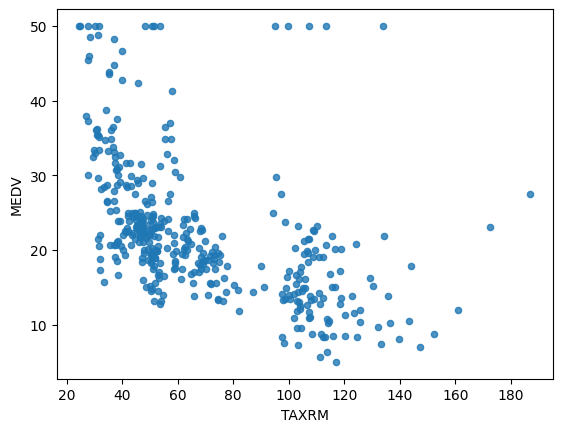

In [17]:
housing.plot(kind='scatter', x='TAXRM', y='MEDV', alpha=0.8)

Separating Labels and Features

In [18]:
housing = x_strat_train.drop('MEDV', axis=1)
housing_labels = x_strat_train['MEDV'].copy()

## Missing Attributes

To tackle of missing attributes, there are three options:
    1. To get rid of the entire data point (the respective row)
    2. To get rid of the entire attribute
    3. To replace the missing value with some value (0 or mean or median)

In [19]:
#option 1
housing.dropna(subset=['RM']).shape

# Note -> original housing dataframe remains unchanged

(400, 13)

Note that 5 rows are missing

In [20]:
#option 2
housing.drop('RM', axis=1).shape

# Note -> original housing dataframe remains unchanged

(404, 12)

Note that 1 column is missing

In [21]:
#option 3
median = housing['RM'].median()

housing['RM'].fillna(median)
# Note -> original housing dataframe remains unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [22]:
housing.describe() # before imputing -> filling missing values

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  400.000000   
mean     3.602814   10.836634   11.344950    0.069307    0.558064    6.275625   
std      8.099383   22.150636    6.877817    0.254290    0.116875    0.711673   
min      0.006320    0.000000    0.740000    0.000000    0.389000    3.561000   
25%      0.086962    0.000000    5.190000    0.000000    0.453000    5.877250   
50%      0.286735    0.000000    9.900000    0.000000    0.538000    6.210000   
75%      3.731923   12.500000   18.100000    0.000000    0.631000    6.630000   
max     73.534100  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    69.039851    3.746210    9.735149  412.341584   18.473267  353.392822   
std     28.258248    2.099057    8.731259  168.672623    2.129243   96.069235   
min      2.900000    1.129600    1.000000  187.000000   13.000000    0.320000   
25%     44.850000    2.035975    4.000000  284.000000   17.400000  374.617500   
50%     78.200000    3.122200    5.000000  337.000000   19.000000  390.955000   
75%     94.100000    5.100400   24.000000  666.000000   20.200000  395.630000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  404.000000  
mean    12.791609  
std      7.235740  
min      1.730000  
25%      6.847500  
50%     11.570000  
75%     17.102500  
max     36.980000

In [23]:
# the above task can be simply implemented using an Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [24]:
imputer.statistics_.shape

(13,)

In [25]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns=housing.columns)
housing_tr.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.602814   10.836634   11.344950    0.069307    0.558064    6.274975   
std      8.099383   22.150636    6.877817    0.254290    0.116875    0.708162   
min      0.006320    0.000000    0.740000    0.000000    0.389000    3.561000   
25%      0.086962    0.000000    5.190000    0.000000    0.453000    5.878750   
50%      0.286735    0.000000    9.900000    0.000000    0.538000    6.210000   
75%      3.731923   12.500000   18.100000    0.000000    0.631000    6.629250   
max     73.534100  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    69.039851    3.746210    9.735149  412.341584   18.473267  353.392822   
std     28.258248    2.099057    8.731259  168.672623    2.129243   96.069235   
min      2.900000    1.129600    1.000000  187.000000   13.000000    0.320000   
25%     44.850000    2.035975    4.000000  284.000000   17.400000  374.617500   
50%     78.200000    3.122200    5.000000  337.000000   19.000000  390.955000   
75%     94.100000    5.100400   24.000000  666.000000   20.200000  395.630000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  404.000000  
mean    12.791609  
std      7.235740  
min      1.730000  
25%      6.847500  
50%     11.570000  
75%     17.102500  
max     36.980000

## Scikit-Learn Design

Primarily, 3 types of objects

1. estimators - estimates a parameter based on a dataset eg:- imputer, it has a fit method (fits the dataset and calculates internal parameters) and transforms method

2. transformers - transform method takes input and returns output based on the learning from fit method it also has a convenience function call fit_transform() which fits and then transforms

3. predictor - LinearRegression model is an example.
fit() and predict() are two common functions. It also give score function which will evaluate the predictions.
Takes numpy array as input

## Feature Scaling

Two Types of Feature scaling methods (primarily):-

    1. Min-max scaling (normalization) (value - min) / (max - min)

        class called MinMaxScaler provided by sklearn

    2. Standardization (value - mean) / sd

        class called StandardScaler provided by sklearn

## Creating Pipeline

Note -> When you do an ML project, all the functions, starting from (here)imputing to the end, should be done in the pipeline.
The above is done for learning purpose

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [27]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [28]:
housing_num_tr.shape

(404, 13)

Predictor uses np array as input so do not convert to dataframe

## Selecting a Desired Model

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()

model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [30]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

prepared_data = my_pipeline.transform(some_data)

In [31]:
model.predict(prepared_data)

array([22.185, 25.53 , 16.343, 23.482, 23.405])

In [32]:
print(some_labels)

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64


## Evaluating the Model

In [33]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)

mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [34]:
rmse

1.2161252347655893

rmse = 0.0 indicates overfitting

## Using Better Evaluation Technique - Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, housing_num_tr, housing_labels, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

In [36]:
rmse_scores

array([2.71121892, 2.46746675, 4.4573761 , 2.68611454, 3.4854651 ,
       2.6734243 , 5.05847725, 3.28935191, 3.0534358 , 3.91884463])

In [37]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std Deviation: ", scores.std())

print_scores(rmse_scores)

Scores:  [2.71121892 2.46746675 4.4573761  2.68611454 3.4854651  2.6734243
 5.05847725 3.28935191 3.0534358  3.91884463]
Mean:  3.380117531377799
Std Deviation:  0.8157863696469316


## Saving the Model - joblib

In [38]:
from joblib import dump, load
dump(model, 'Price_Predictor.joblib')

['Price_Predictor.joblib']

## Testing the Model on Test Data

In [39]:
x_test_final = x_strat_test.drop('MEDV', axis=1)
y_test = x_strat_test['MEDV'].copy()

x_test_prepared = my_pipeline.transform(x_test_final)
final_predictions = model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [40]:
final_rmse

2.771529007464233

In [41]:
prepared_data

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.2360792 , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.50902369, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.29553121,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.1428346 , -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.05234772, -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]])

## Using the Model

The following can be done in another notebook by simply loading the model there

In [43]:
from joblib import dump, load
import numpy as np

model = load('Price_Predictor.joblib')

In [44]:
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.2360792 , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034]])

model.predict(features)

array([22.185])